In [1]:
# Generate Sample Data with Moderate Fitting and Outliers
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
np.random.seed(42)
n_samples = 100

advertising_spending = np.random.uniform(500, 4000, n_samples)
customer_reviews = np.random.uniform(3, 5, n_samples)
seasonal_trends = np.random.uniform(-15, 15, n_samples)
competitor_pricing = np.random.uniform(30, 250, n_samples)

# Introduce Outliers
advertising_spending[95:] = 7000
customer_reviews[90:] = 1
seasonal_trends[85:] = -30
competitor_pricing[80:] = 300

# Create DataFrame
df = pd.DataFrame({
    'Advertising': advertising_spending,
    'CustomerReviews': customer_reviews,
    'SeasonalTrends': seasonal_trends,
    'CompetitorPricing': competitor_pricing
})

# Introduce some randomness to the target variable
df['Sales'] = 2 * df['Advertising'] + 3 * df['CustomerReviews'] - 1 * df['SeasonalTrends'] + 0.5 * df['CompetitorPricing'] + np.random.normal(0, 150, n_samples)

# Save data to CSV
df.to_csv('online_retail_sales_data_moderate_fit.csv', index=False)

# Display the first few rows of the generated data
df.head()


,Advertising,CustomerReviews,SeasonalTrends,CompetitorPricing,Sales
0,1810.890416,3.062858,4.260949,41.369979,3843.215268
1,3827.500072,4.272821,-12.475801,146.898019,7756.893994
2,3061.978796,3.628712,-10.151139,148.939727,6321.757676
3,2595.304695,4.017141,11.956626,170.234578,5229.281464
4,1046.065242,4.815133,3.192872,189.740093,2246.878010



Model Evaluation:
Mean Absolute Error (MAE): 112.8945204105695
Mean Squared Error (MSE): 19050.04383421188
Root Mean Squared Error (RMSE): 138.02189621292658


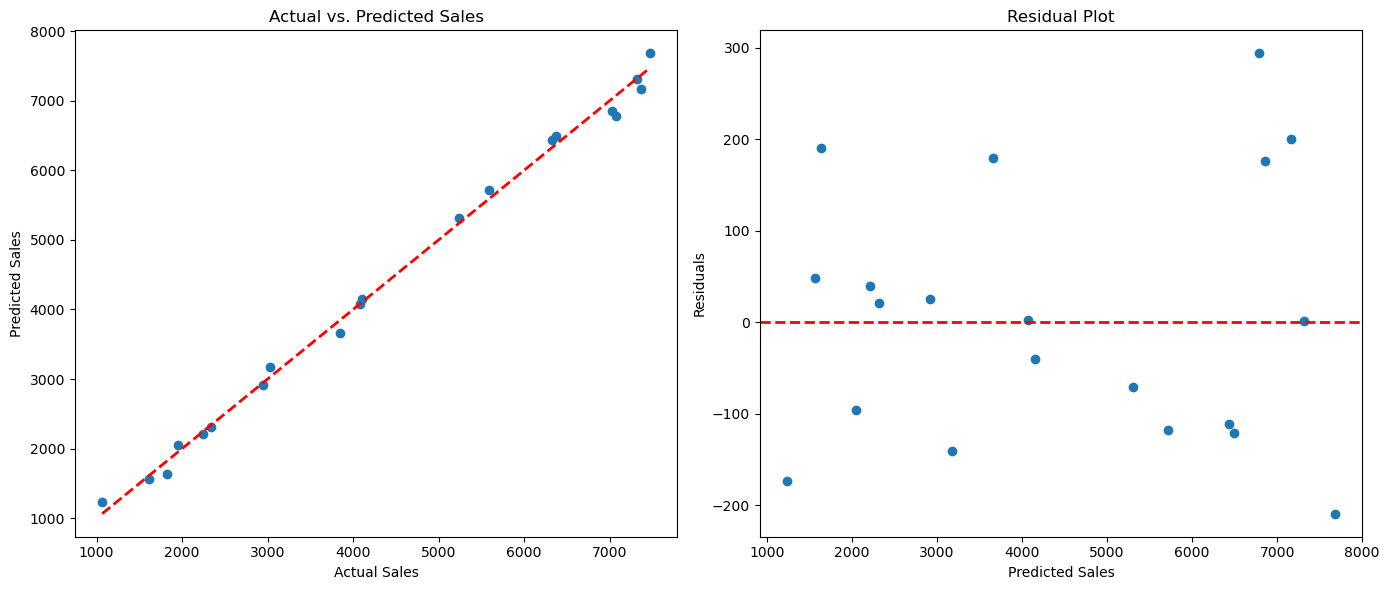

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the generated data
df = pd.read_csv('online_retail_sales_data_moderate_fit.csv')

# Selecting features (independent variables) and the target variable
X = df[['Advertising', 'CustomerReviews', 'SeasonalTrends', 'CompetitorPricing']]
y = df['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('\nModel Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualizing the predicted vs. actual values with a residual plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Scatter plot with a regression line
axes[0].scatter(y_test, y_pred)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axes[0].set_title('Actual vs. Predicted Sales')
axes[0].set_xlabel('Actual Sales')
axes[0].set_ylabel('Predicted Sales')

# Residual plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Sales')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()
